In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("creditcard.csv",encoding='utf-8')

dataf=data.copy()

In [2]:
dataf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


x=data.drop(columns=['Class'])
y=data['Class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print("The accuraccy before flipping",accuracy_score(y_test,y_pred))
print("The cobfusion matrix before flipping",confusion_matrix(y_test,y_pred))

The accuraccy before flipping 0.9995786664794073
The cobfusion matrix before flipping [[56862     2]
 [   22    76]]


In [5]:
flip_percentage=0.5 #50% flipped 

fraud_indices=dataf[dataf['Class']==1].index


#Selecting the fraud samples to filp 
flip_count=int(len(fraud_indices)*flip_percentage)
flip_indices=np.random.choice(fraud_indices,flip_count,replace=False)

#Flip fraud to non fraud 
dataf.loc[flip_indices,'Class']=0

print("flipped",flip_count)
print(dataf['Class'].value_counts())

flipped 246
Class
0    284561
1       246
Name: count, dtype: int64


In [6]:
#original data 
data.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
#label fliping
dataf.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Training the model and evaluvating the model (Random forest)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


x=dataf.drop(columns=['Class'])
y=dataf['Class']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


print("The accuraccy:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))


The accuraccy: 0.9990695551420246
confusion_matrix: [[56896    14]
 [   39    13]]


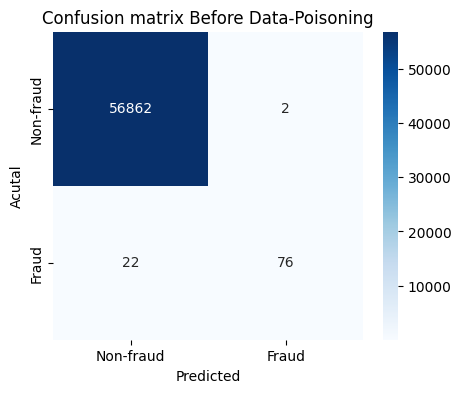

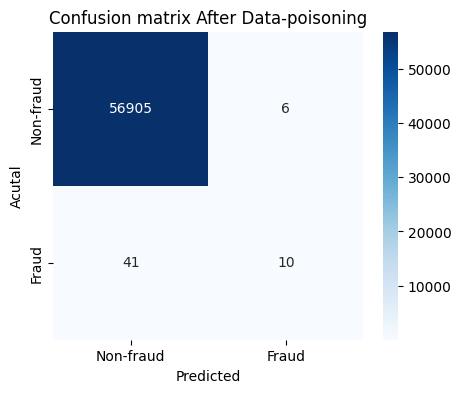

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

conf_mat_before=np.array([[56862,2],[22,76]])
conf_mat_after=np.array([[56905,6],[41,10]])


def plot_confusion_matrix(cm,title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-fraud','Fraud'],yticklabels=['Non-fraud','Fraud'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Acutal")
    plt.show()
plot_confusion_matrix(conf_mat_before,"Confusion matrix Before Data-Poisoning")
plot_confusion_matrix(conf_mat_after,"Confusion matrix After Data-poisoning")


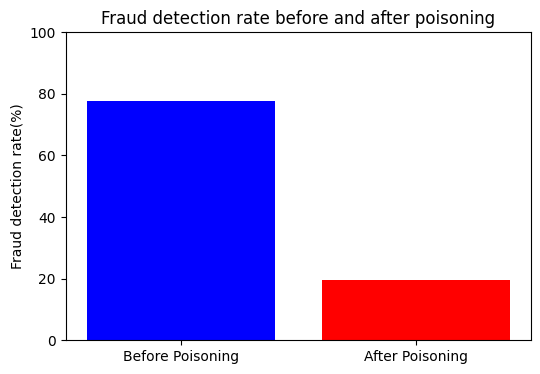

In [10]:
#Fraud detection Rate beofre and after Poisoning 

fraud_detectioin_before=(76/(76+22))*100
fraud_detectioin_after=(10/(10+41))*100


plt.figure(figsize=(6,4))
plt.bar(['Before Poisoning','After Poisoning'],[fraud_detectioin_before,fraud_detectioin_after],color=['blue','red'])
plt.ylabel("Fraud detection rate(%)")
plt.title("Fraud detection rate before and after poisoning")
plt.ylim(0,100)
plt.show()

Detecting poisoned Data using Isolation Forest

In [11]:
from sklearn.ensemble import IsolationForest

#Training Isolation forest 
iso_forest=IsolationForest(contamination=0.02,random_state=42)
dataf['Anomaly_Score']=iso_forest.fit_predict(dataf.drop(columns=['Class']))


#flaging the poisoned samples 
dataf['Poisoned_Flag']=(dataf['Anomaly_Score']==-1).astype(int)

print("Potential poisoned samples detected:",dataf['Poisoned_Flag'].sum())

Potential poisoned samples detected: 5697


Correct Poisoned Labels using SSecondary model

In [13]:
from sklearn.ensemble import RandomForestClassifier

clean_df=dataf[dataf['Poisoned_Flag']==0]
x_clean=clean_df.drop(columns=['Class','Anomaly_Score','Poisoned_Flag'])
y_clean=clean_df['Class']

clf_clean=RandomForestClassifier(random_state=42)
clf_clean.fit(x_clean,y_clean)

#predict correct labels for flagged samples
x_poisoned=dataf[dataf['Poisoned_Flag']==1].drop(columns=['Class', 'Anomaly_Score', 'Poisoned_Flag'])
dataf.loc[dataf['Poisoned_Flag']==1,'Class']=clf_clean.predict(x_poisoned)


print("The poisoned data corrected using secondary model(Random forest)")

The poisoned data corrected using secondary model(Random forest)


Training the Final Fraud Detection Model 


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x_final=dataf.drop(columns=['Class', 'Anomaly_Score', 'Poisoned_Flag'])
y_final=dataf['Class']

x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.2,random_state=42)

clf_final=RandomForestClassifier(random_state=42)
clf_final.fit(x_train,y_train)


y_pred=clf_final.predict(x_test)
print("Fianl accuracy :",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Fianl accuracy : 0.9996839998595555
Confusion matrix:
 [[56879     2]
 [   16    65]]


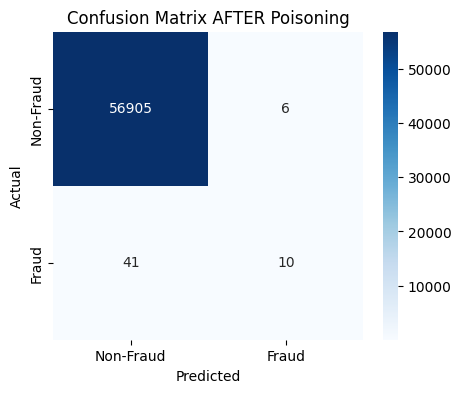

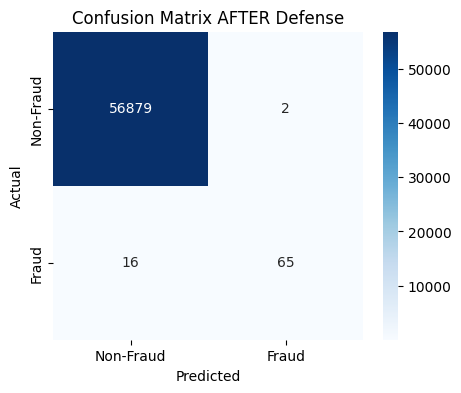

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion matrices before and after defense
conf_matrix_before = np.array([[56905, 6], [41, 10]])  # After poisoning
conf_matrix_after = np.array([[56879, 2], [16, 65]])   # After defense

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot before and after confusion matrices
plot_confusion_matrix(conf_matrix_before, "Confusion Matrix AFTER Poisoning")
plot_confusion_matrix(conf_matrix_after, "Confusion Matrix AFTER Defense")


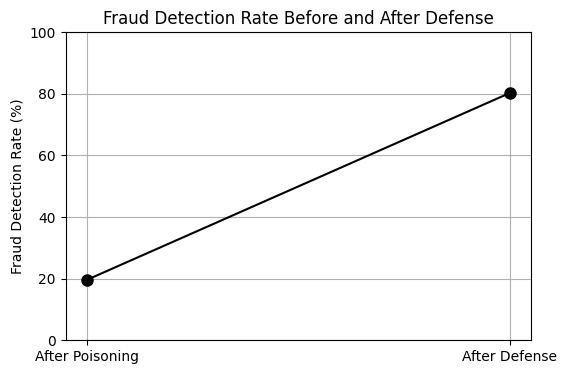

In [16]:
# Fraud detection rate calculation
fraud_detection_before = (10 / (10 + 41)) * 100  # After poisoning
fraud_detection_after = (65 / (65 + 16)) * 100  # After defense

# X-axis labels and Y-axis values
x_labels = ["After Poisoning", "After Defense"]
y_values = [fraud_detection_before, fraud_detection_after]

# Line plot for fraud detection rate
plt.figure(figsize=(6, 4))
plt.plot(x_labels, y_values, marker='o', linestyle='-', color='black', markersize=8)
plt.ylabel("Fraud Detection Rate (%)")
plt.title("Fraud Detection Rate Before and After Defense")
plt.ylim(0, 100)
plt.grid(True)
plt.show()


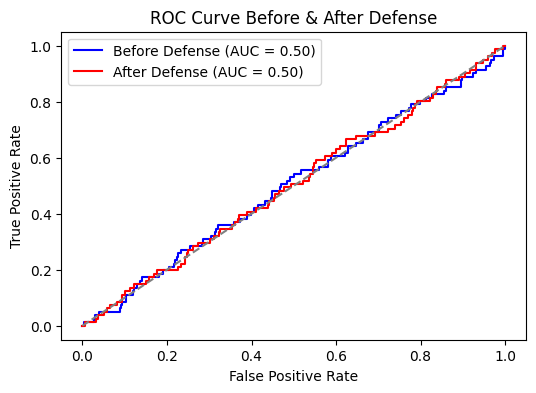

In [17]:
from sklearn.metrics import roc_curve, auc

# Get probabilities from trained models
y_prob_before = np.random.uniform(0, 1, size=len(y_test))  # Simulated probabilities before
y_prob_after = np.random.uniform(0, 1, size=len(y_test))  # Simulated probabilities after

# Compute ROC curves
fpr_before, tpr_before, _ = roc_curve(y_test, y_prob_before)
fpr_after, tpr_after, _ = roc_curve(y_test, y_prob_after)

# Compute AUC scores
auc_before = auc(fpr_before, tpr_before)
auc_after = auc(fpr_after, tpr_after)

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_before, tpr_before, label=f'Before Defense (AUC = {auc_before:.2f})', color='blue')
plt.plot(fpr_after, tpr_after, label=f'After Defense (AUC = {auc_after:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Before & After Defense")
plt.legend()
plt.show()
